1. What are the top 10 states in which most people are affected by coronavirus?
2. What are the top 20 countries in which most people have died from coronavirus?
3. Plot a bar graph of the top 10 countries in which most people have died from coronavirus.
4. Plot a bar graph of the top 15 countries in which most people have recovered from coronavirus.
5. Change the dtype of the 'ObservationDate' column to datetime.
6. Find the average deaths and recoveries by each country for the first 5 months of 2020 and 2021.
7. What are the top 10 Province/State with confirmed cases?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('covid_19_data.csv')

In [3]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [5]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [6]:
df.shape

(306429, 8)

In [65]:
df.isna().sum()

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [66]:
df.dropna(inplace=True)

## Top 10 states in which most peoples are affected from coronavirus?

In [67]:
df['Province/State'].unique()

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan',
       'Tianjin', 'Tibet', 'Washington', 'Xinjiang', 'Yunnan', 'Zhejiang',
       'Unknown', 'Chicago', 'Illinois', 'California', 'Arizona',
       'Ontario', 'New South Wales', 'Victoria', 'British Columbia',
       'Bavaria', 'Queensland', 'Chicago, IL', 'South Australia',
       'Boston, MA', 'Los Angeles, CA', 'Orange, CA', 'Santa Clara, CA',
       'Seattle, WA', 'Tempe, AZ', 'San Benito, CA', 'Toronto, ON',
       'London, ON', 'Madison, WI', 'Cruise Ship',
       'Diamond Princess cruise ship', 'San Diego County, CA',
       'San Antonio, TX', 'Ashland, NE', 'Travis, CA',
       'From Diamond Princess', 'Lackland, TX', 'Humboldt C

In [68]:
df['Province/State'].nunique()

736

In [69]:
df.groupby('Province/State')['Confirmed'].sum().sort_values(ascending=False).head(10)

Province/State
California        696898013.0
Maharashtra       681186928.0
England           666227518.0
Texas             552039886.0
Sao Paulo         521308945.0
Florida           429469197.0
New York          380636880.0
Karnataka         282256260.0
Illinois          263055187.0
Andhra Pradesh    254740494.0
Name: Confirmed, dtype: float64

## Top 20 Country in which most peoples are Died from coronavirus?

In [70]:
df['Country/Region'].nunique()

29

In [71]:
df.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(20)

Country/Region
US                123303762.0
Brazil             72339029.0
India              44256013.0
Mexico             42918161.0
UK                 27316263.0
Italy              24852224.0
Russia             18271229.0
Spain              18124340.0
Colombia           13962927.0
Germany            13150115.0
Peru               13119233.0
Ukraine             6209502.0
Chile               5707664.0
Canada              5692896.0
Belgium             4219275.0
Netherlands         3616057.0
Pakistan            3489065.0
Sweden              3167242.0
Mainland China      2089872.0
Japan               1555677.0
Name: Deaths, dtype: float64

## Plot bar graph of top 10 countries in which most people are died


In [72]:
top10=df.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(10).reset_index()

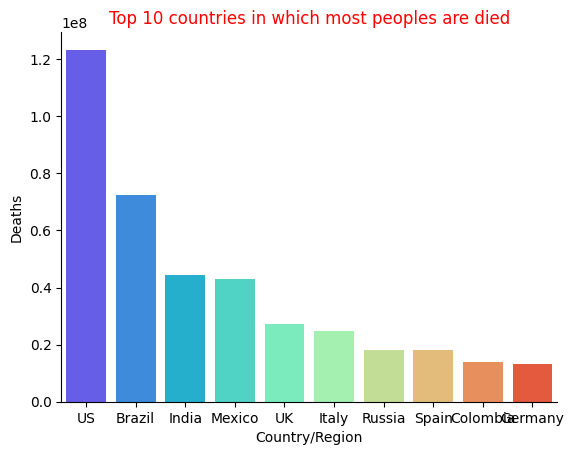

In [73]:
fig,ax=plt.subplots()
ax=sns.barplot(data=top10,x='Country/Region',y='Deaths',palette='rainbow')
ax.set_title('Top 10 countries in which most peoples are died',color='r')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


## Plot bar graph of top 15 countries in which most people are Recovered


In [74]:
top15=df.groupby('Country/Region')['Recovered'].sum().sort_values(ascending=False).head(15).reset_index()

In [75]:
top15

,Country/Region,Recovered
0,India,2.898258e+09
1,Brazil,2.311993e+09
2,Russia,7.883275e+08
3,US,5.033710e+08
4,Italy,4.851544e+08
5,Colombia,4.686380e+08
6,Germany,4.493167e+08
7,Mexico,3.612402e+08
8,Peru,3.227364e+08
9,Ukraine,2.342478e+08


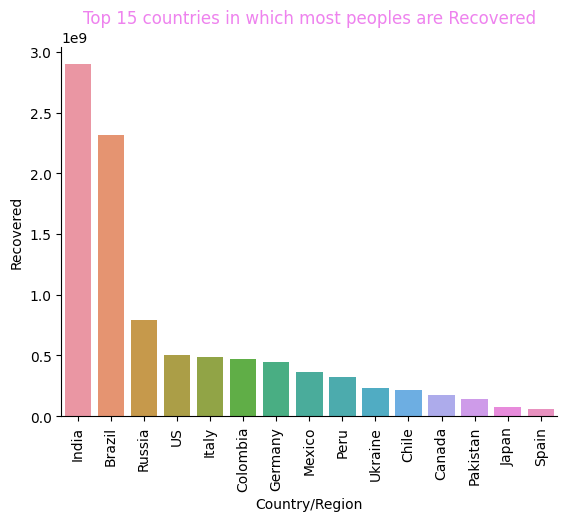

In [76]:
fig,ax=plt.subplots()
ax=sns.barplot(data=top15,x='Country/Region',y='Recovered')
ax.set_title('Top 15 countries in which most peoples are Recovered',color='violet')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(top15['Country/Region'],rotation=90)
plt.show()

In [77]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


## Change observationDate dtype as date time 

In [84]:
df['ObservationDate']=pd.to_datetime(df['ObservationDate'])

In [85]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


##   find 2020 and 2021 first 5 months average deaths and recovered by each country

In [119]:
d_2020=df[(df.loc[:,'ObservationDate']>='2020-01-01')&(df.loc[:,'ObservationDate']<'2020-06-01')]

In [120]:
d_2021=df[(df.loc[:,'ObservationDate']>='2021-01-01')&(df.loc[:,'ObservationDate']<'2021-06-01')]

In [137]:
p_2020=d_2020.groupby('Country/Region')['Deaths'].median().sort_values(ascending=False).reset_index()
p_2020.head()


,Country/Region,Deaths
0,Spain,504.0
1,Italy,404.5
2,Germany,188.0
3,Brazil,179.0
4,Mexico,109.5


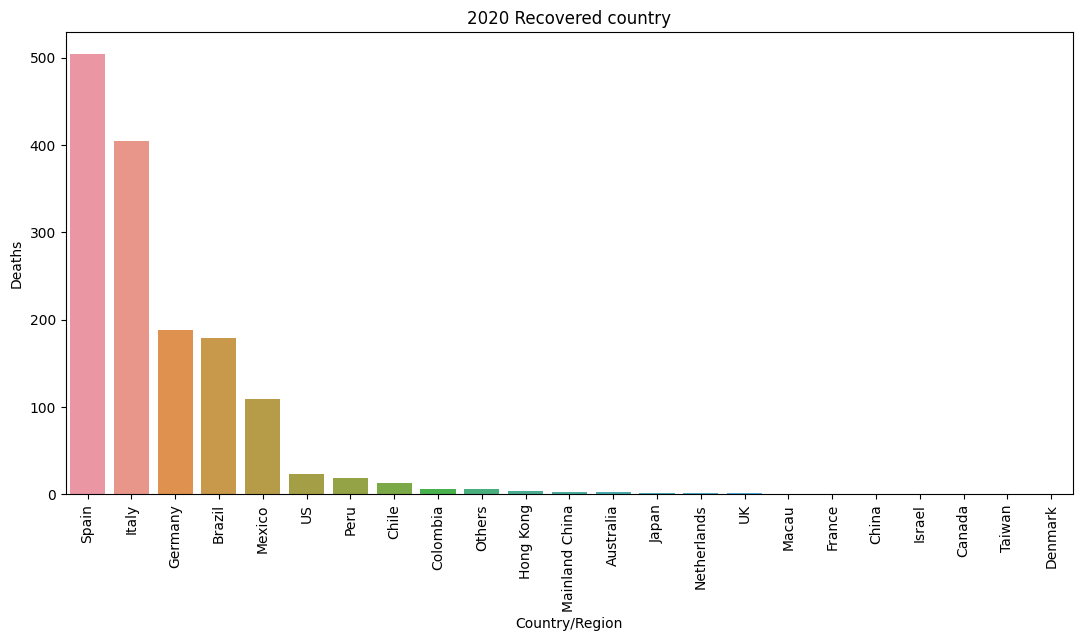

In [138]:
fig,ax=plt.subplots(figsize=(13,6))
ax=sns.barplot(data=p_2020,x='Country/Region',y='Deaths')
ax.set_xticklabels(p_2020['Country/Region'],rotation=90)
ax.set_title('2020 Recovered country')
plt.show()

In [141]:
p_2020=d_2020.groupby('Country/Region')['Recovered'].median().sort_values(ascending=False).reset_index()
p_2020.head()


,Country/Region,Recovered
0,Germany,4500.0
1,Italy,2523.5
2,Spain,1519.0
3,Mexico,765.5
4,Mainland China,172.0


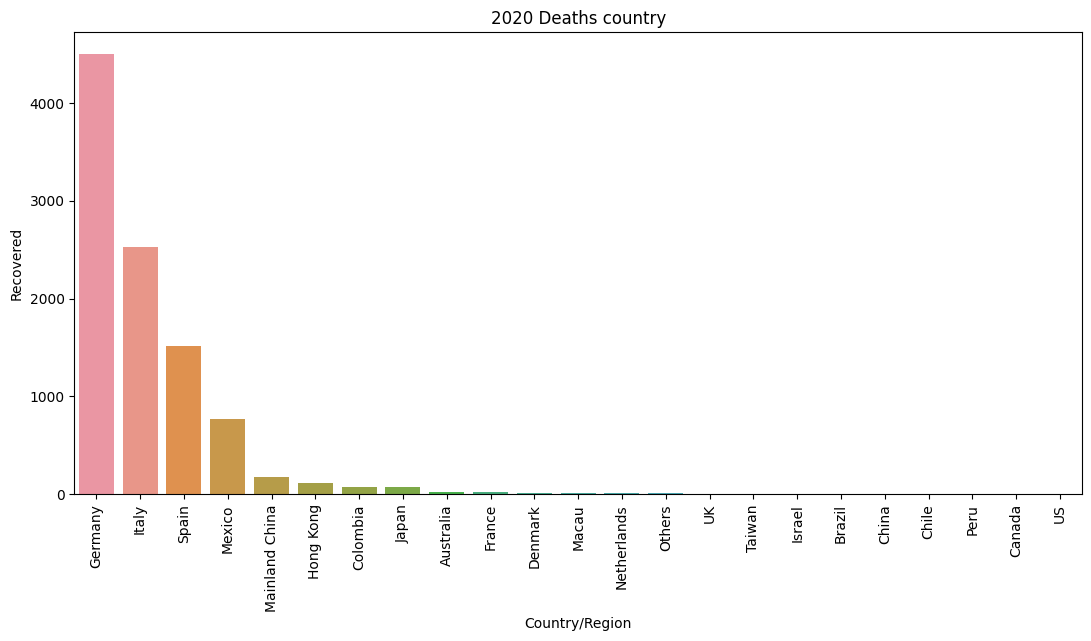

In [142]:
fig,ax=plt.subplots(figsize=(13,6))
ax=sns.barplot(data=p_2020,x='Country/Region',y='Recovered')
ax.set_xticklabels(p_2020['Country/Region'],rotation=90)
ax.set_title('2020 Deaths country')

plt.show()

In [135]:
p_2021=d_2021.groupby('Country/Region')['Deaths'].median().sort_values(ascending=False).reset_index()
p_2021.head()

,Country/Region,Deaths
0,Brazil,6648.0
1,US,5187.0
2,Mexico,3901.0
3,Germany,2946.0
4,Italy,2917.0


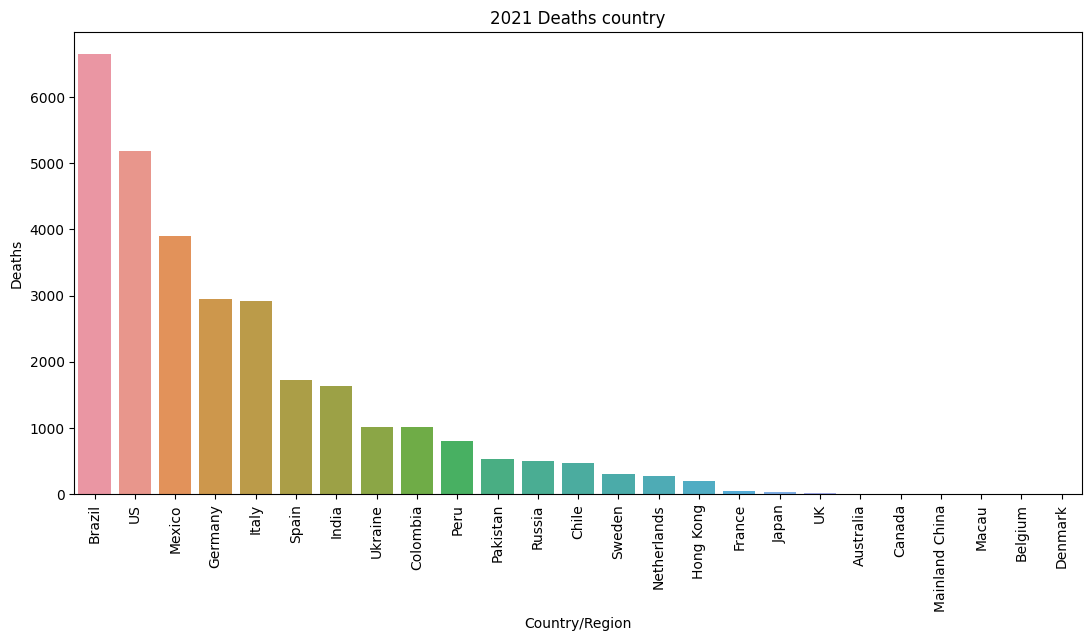

In [136]:
fig,ax=plt.subplots(figsize=(13,6))
ax=sns.barplot(data=p_2021,x='Country/Region',y='Deaths')
ax.set_xticklabels(p_2021['Country/Region'],rotation=90)
ax.set_title('2021 Deaths country')

plt.show()

In [132]:
p_2021=d_2021.groupby('Country/Region')['Recovered'].median().sort_values(ascending=False).reset_index()
p_2021.head()

,Country/Region,Recovered
0,Brazil,259083.0
1,India,159790.0
2,Germany,84860.0
3,Italy,68933.0
4,Ukraine,45527.0


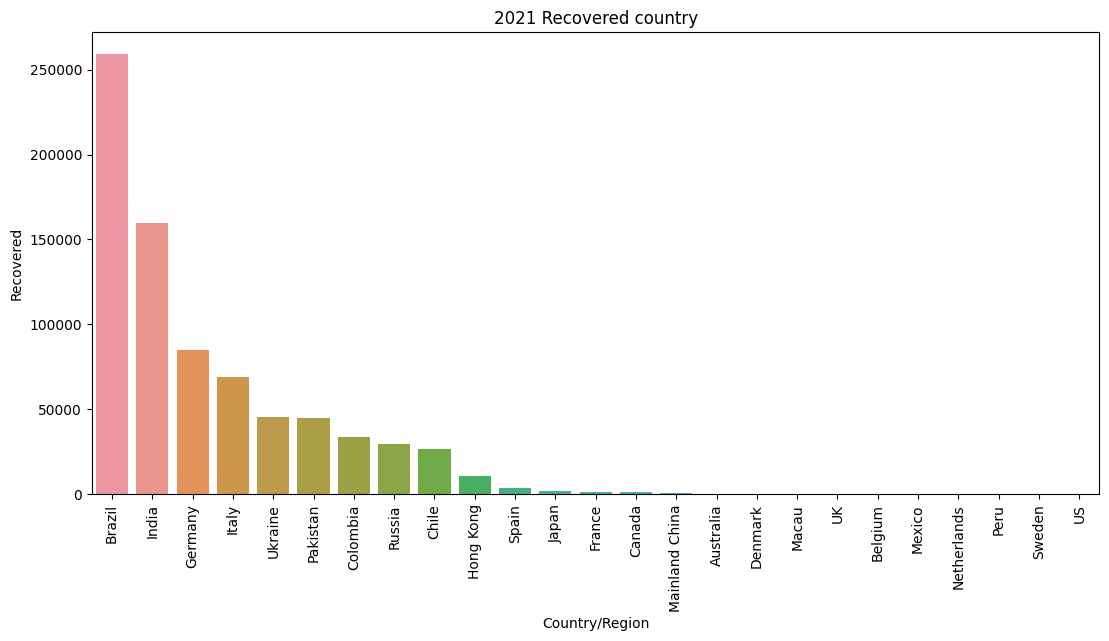

In [134]:
fig,ax=plt.subplots(figsize=(13,6))
ax=sns.barplot(data=p_2021,x='Country/Region',y='Recovered')
ax.set_xticklabels(p_2021['Country/Region'],rotation=90)
ax.set_title('2021 Recovered country')
plt.show()

##  Top 10 Province/State	Confirmed Cases

In [143]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [148]:
df.groupby('Province/State')['Confirmed'].sum().sort_values(ascending=False)

Province/State
California               696898013.0
Maharashtra              681186928.0
England                  666227518.0
Texas                    552039886.0
Sao Paulo                521308945.0
                            ...     
American Samoa                   0.0
Jervis Bay Territory             0.0
Recovered                        0.0
Montgomery County, TX            0.0
External territories             0.0
Name: Confirmed, Length: 736, dtype: float64